In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading the CSV file
data = pd.read_csv('titanic.csv')

In [3]:
# Display the first few rows of the dataset 
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

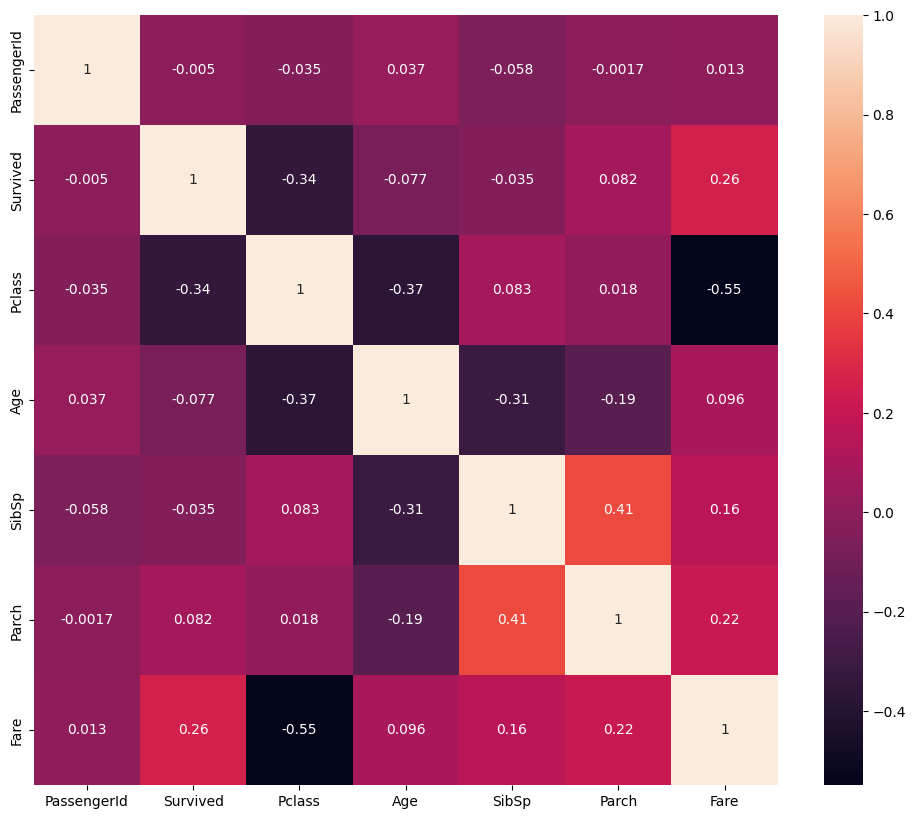

In [8]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

In [9]:
# Handle missing values
# Fill missing Age values with the median age
# Age is an important factor in survival, so we fill missing values with the median age to preserve the distribution
data['Age'].fillna(data['Age'].median(), inplace=True)


In [10]:
# Fill missing Embarked values with the mode
# Embarked location can provide insights into socio-economic status, filling with mode (most common value) ensures minimal data loss
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [11]:
# Drop the Cabin column due to missing values
# Cabin information is largely missing, making imputation unreliable; we drop it to avoid introducing noise
data.drop(columns=['Cabin'], inplace=True)


In [12]:
# Convert categorical features to numerical
# Map 'Sex' to numerical values
# Sex is a binary category and can directly influence survival chances, converting it to numerical values for model compatibility
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [13]:
# One-hot encode the Embarked column
# Embarked has multiple categories and one-hot encoding prevents any ordinal assumptions
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [14]:
# Create FamilySize feature
# FamilySize (number of family members aboard) can influence survival; we create this feature by combining SibSp and Parch
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [15]:
# Extract titles from the Name column
# Titles can indicate social status, which affects survival; we extract and map them to numerical values
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
data['Title'] = data['Title'].replace(['Ms', 'Mlle'], 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
title_mapping = {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Others': 4}
data['Title'] = data['Title'].map(title_mapping)

In [16]:
# Drop the Name and Ticket columns as they are not useful for the model
# Name and Ticket columns contain mostly unique values that don't directly contribute to survival predictions
data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [17]:
# Create age bins and one-hot encode them
# Age groups can have different survival probabilities; binning and encoding helps capture this without assuming linearity
data['AgeBin'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
data = pd.get_dummies(data, columns=['AgeBin'], drop_first=True)

In [18]:
# Standardize numerical features
# Standardization ensures that features with larger scales do not dominate the model training
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'FamilySize']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [19]:
# Standardize numerical features
# Standardization ensures that features with larger scales do not dominate the model training
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'FamilySize']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

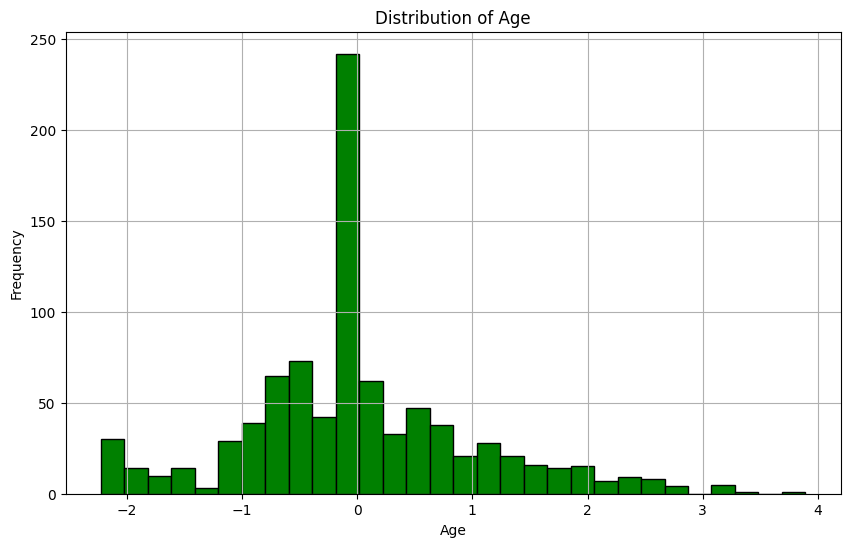

In [20]:
# Visualization 1: Distribution of Age
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=30, edgecolor='black', color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


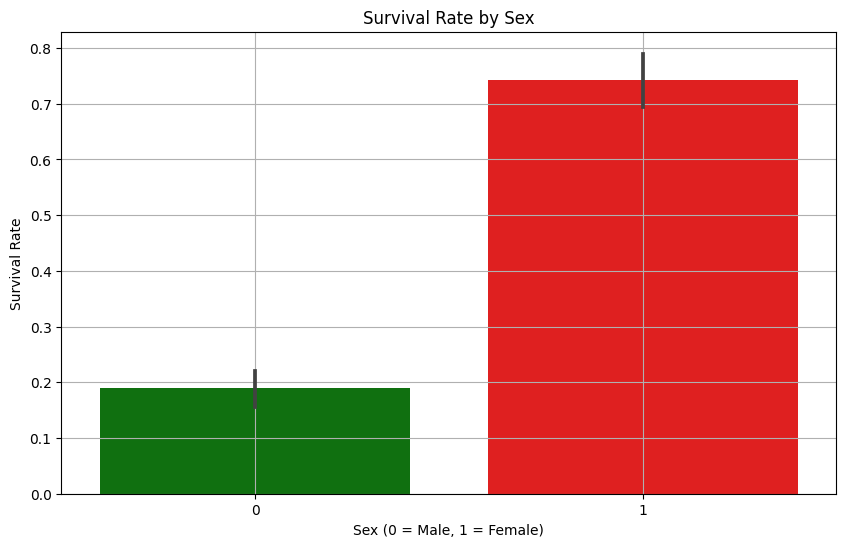

In [21]:
# Insight: Most passengers are young adults, with a smaller number of children and seniors.
# Visualization 2: Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=data, palette=['green', 'red'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

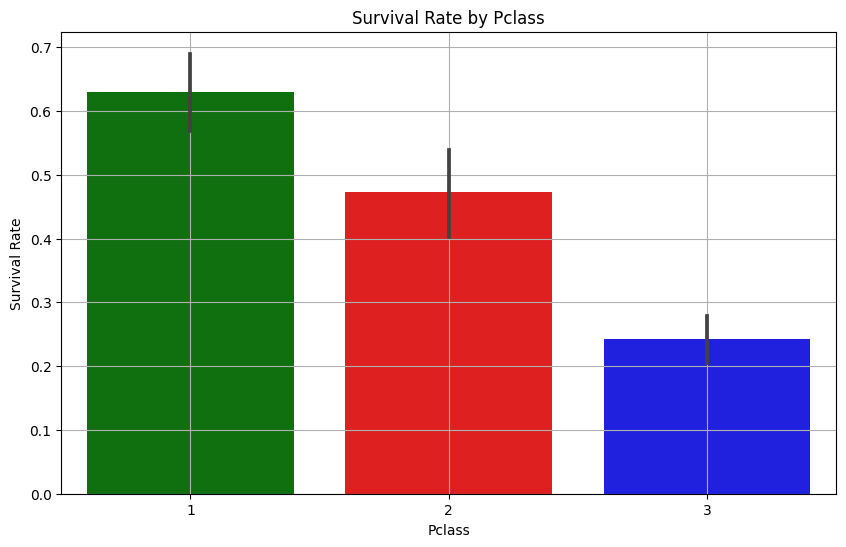

In [22]:
# Insight: Females had a higher survival rate than males, likely due to "women and children first" policy during evacuation.
# Visualization 3: Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data, palette=['green', 'red', 'blue'])
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

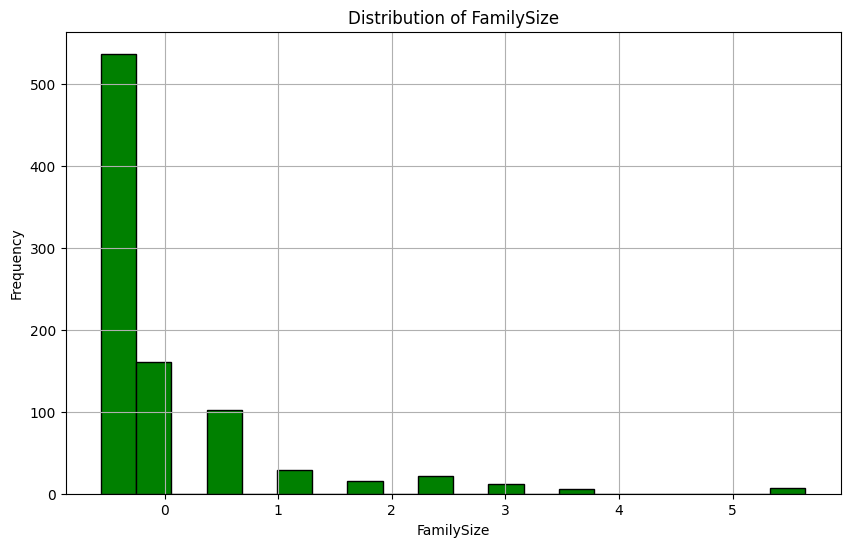

In [23]:
# Insight: Passengers in higher classes (1st class) had a better chance of survival compared to those in lower classes.
# Visualization 4: FamilySize distribution
plt.figure(figsize=(10, 6))
plt.hist(data['FamilySize'], bins=20, edgecolor='black', color='green')
plt.title('Distribution of FamilySize')
plt.xlabel('FamilySize')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

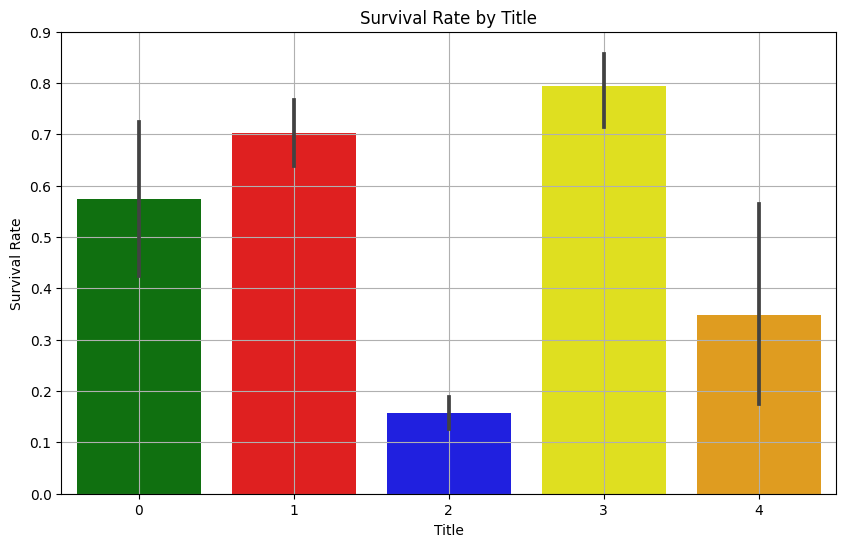

In [24]:
# Insight: Most passengers traveled alone or with one family member, larger families were less common.
# Visualization 5: Survival rate by Title
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=data,palette=['green', 'red', 'blue','yellow','orange'])
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

In [25]:
# Insight: Titles denoting higher social status (e.g., Mrs, Miss) corresponded with greater survival rates than titles such as Mr and Others.
